# 🎯 Análisis Caso de Estudio Saber Pro

**📅 Fecha:** 2025  
**👤 Equipo:** [Hector Hernan Betancourt Lopez; Marcela Fajardo Bermúdez y Gustavo Adolfo Escobar Mayor]  
**📋 Pregunta SMART:**

* ¿Existe una relación entre las variables sociodemográficas y académicas de los estudiantes de pregrado de la Universidad Icesi y los resultados de las pruebas saber pro obtenidos entre 2017 - 2024?


* ¿Cuáles variables están significativamente asociadas con el desempeño de los estudiantes de pregrado de la universidad Icesi en el examen saber pro del 2017-2024?

---


##  **I. Entendimiento del problema:**

El propósito de este proyecto de analítica es comprender y predecir el desempeño de los estudiantes de pregrado de la Universidad Icesi en el examen Saber Pro durante el periodo 2017 - 2024. Este examen constituye una herramienta fundamental para evaluar la calidad educativa y el nivel de competencias de los estudiantes en distintas áreas de formación, además de ser un referente nacional en la medición de la calidad de la educación superior.

Para ello, se cuenta con un conjunto de datos que contiene los resultados de las pruebas saber pro de los estudiantes de la Universidad Icesi, adicionalmente, se cuenta con bd de variables que describen las características sociodemograficas y académicas de los estudiantes.


##  **II. Entendimiento de los datos:**

In [999]:
#Importar librerias 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Markdown



# Estilos
rcParams['figure.figsize'] = (12,  6)

In [1000]:
#from google.colab import drive
#drive.mount('/content/drive')

### **Cargar los archivos que serán utilizados**

In [1001]:
df = pd.read_excel("C:/Users/mafab/Downloads/IN_SITU/2017_2024.xlsx")
df1 = pd.read_csv("C:/Users/mafab/Downloads/IN_SITU/datos_completos3.txt", sep=";", encoding='latin-1')

### **📋 Dataset Saber Pro 2017 - 2024**

#### **Información general del DF**

In [1002]:
def imprimir_informacion(df):
    print("="*40)
    print(f"📊 **Resumen del DataFrame** 📊")
    print("="*40)
    print(f"Dimensión:    {df.shape}")
    print(f"Tamaño total: {df.size}")
    print("\nℹ️ Información del DataFrame:\n")
    print("-"*40)
    df.info()
# Llamar a la función
imprimir_informacion(df)

📊 **Resumen del DataFrame** 📊
Dimensión:    (6884, 8)
Tamaño total: 55072

ℹ️ Información del DataFrame:

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        6884 non-null   int64 
 1   Tipo de documento          6884 non-null   object
 2   Documento                  6884 non-null   object
 3   Nombre                     6884 non-null   object
 4   Número de registro (EK)    6884 non-null   object
 5   Programa                   6884 non-null   object
 6   Puntaje global             6884 non-null   object
 7   Percentil nacional global  6883 non-null   object
dtypes: int64(1), object(7)
memory usage: 430.4+ KB


**Interpretación:**

La información anterior indica que entre 2017 y 2024 un total de 6.884 estudiantes aplicaron las pruebas saber pro en la Universidad. Adicionalmente, las características asociadas al estudiante (variables) corresponden a 8. El número de elementos de la base de datos corresponde a 55.072

#### **Cambiar tipo de formato de variables y Visualizar las primeras filas**

**Nota:**

* Al intentar cambiar el tipo de dato de la columna "documento" de object a int64, aparecieron 20 valores nulos. Estos corresponden a los registros de documentos que son pasaportes, ya que contienen tanto letras como números y no pueden convertirse en enteros. Por eso, decidimos mantenerlos como cadenas de texto (str), para conservar toda la información


* Adicional, es necesario cambiar el formato de las variables puntaje y percentil global a float, pq sino no detecta los datos vacios.

In [1003]:
df['Documento'] = df['Documento'].astype(str)
df['Puntaje global'] = pd.to_numeric(df['Puntaje global'], errors='coerce')
df['Percentil nacional global'] = pd.to_numeric(df['Percentil nacional global'], errors='coerce')

In [1004]:
def visualización_formato_variables(df):
    display(Markdown("="*40))
    display(Markdown("**Información del tipo formato variables:**"))
    print(df.dtypes)
    display(Markdown("="*40))

    display(Markdown("**Visualización primeras filas:**"))
    display(df.head(2))

visualización_formato_variables(df)


========================================

**Información del tipo formato variables:**

Año                            int64
Tipo de documento             object
Documento                     object
Nombre                        object
Número de registro (EK)       object
Programa                      object
Puntaje global               float64
Percentil nacional global    float64
dtype: object


========================================

**Visualización primeras filas:**

,Año,Tipo de documento,Documento,Nombre,Número de registro (EK),Programa,Puntaje global,Percentil nacional global
0,2017,CC,1151957190,DANIELA NASNER TACAN,EK201730708552,MEDICINA,177.0,89.0
1,2017,CC,1144066232,JUAN CAMILO CASTILLO RAMIREZ,EK201730962340,MEDICINA,198.0,98.0


#### **Identificación de registros duplicados**

**Nota:**

Se verifican duplicados basados en la columna "Documento" del DF

In [1005]:
duplicados_detectados = df.duplicated(subset=["Documento"]).sum()
print("El número de registros duplicados según el número de documento es:", duplicados_detectados)

El número de registros duplicados según el número de documento es: 33


#### **Identificación de columnas con valores nulos**

In [1006]:
def mostrar_informacion_nulos(df):
    nulos = df.isnull().sum()
    porcentaje_nulos = df.isnull().mean() * 100

    display(Markdown("**Conteo y porcentaje de valores nulos por columna**"))

    # Crear una tabla combinada con conteo y porcentaje
    resumen_nulos = pd.DataFrame({'Conteo nulos': nulos,'Porcentaje nulos (%)': porcentaje_nulos.round(2)})
    print(resumen_nulos.to_markdown())

mostrar_informacion_nulos(df)


**Conteo y porcentaje de valores nulos por columna**

|                           |   Conteo nulos |   Porcentaje nulos (%) |
|:--------------------------|---------------:|-----------------------:|
| Año                       |              0 |                   0    |
| Tipo de documento         |              0 |                   0    |
| Documento                 |              0 |                   0    |
| Nombre                    |              0 |                   0    |
| Número de registro (EK)   |              0 |                   0    |
| Programa                  |              0 |                   0    |
| Puntaje global            |             36 |                   0.52 |
| Percentil nacional global |             38 |                   0.55 |


### **📋 Dataset variables independientes**

#### **Información general del DF1**

In [1007]:
imprimir_informacion(df1)

📊 **Resumen del DataFrame** 📊
Dimensión:    (7446, 55)
Tamaño total: 409530

ℹ️ Información del DataFrame:

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7446 entries, 0 to 7445
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Documento                                 7446 non-null   object 
 1   PUNTAJE_GLOBAL_SABER_11                   6472 non-null   float64
 2   NIVEL_MATEMATICAS_SABER_11                6450 non-null   float64
 3   PUNTAJE_MATEMATICAS_SABER_11              6450 non-null   float64
 4   NIVEL_LECTURA_CRITICA_SABER_11            4502 non-null   float64
 5   PUNTAJE_LECTURA_CRITICA_SABER_11          4502 non-null   float64
 6   NIVEL_INGLES_SABER_11                     5851 non-null   object 
 7   PUNTAJE_INGLES_SABER_11                   5851 non-null   float64
 8   NIVEL_COMPETENCIAS_CIUDADANAS

**Interpretación:**

El dataset de las variables independientes tiene un total de 7.446 registros y 55 columnas que corresponden a información académica y de caracterización de los estudiantes de la Universidad. El número de elementos de la base de datos corresponde a 409.530

#### **Cambiar tipo de formato de variables y Visualizar las primeras filas**

In [ ]:
df1['Documento'] = df1['Documento'].astype(str)
df_final['ESTRATO'] = pd.to_numeric(df_final['ESTRATO'], errors='coerce').fillna(0).astype(int)

In [1009]:
# Verificar duplicados basados en la columna "Documento" en df_concatenado
duplicados_detectados2 = df1.duplicated(subset=["Documento"]).sum()

print("El número de registros duplicados según el número de documento es:", duplicados_detectados2)

El número de registros duplicados según el número de documento es: 601


#### **Identificación de columnas con valores nulos**



In [1010]:
df1.isnull().sum()

Documento                                      0
PUNTAJE_GLOBAL_SABER_11                      974
NIVEL_MATEMATICAS_SABER_11                   996
PUNTAJE_MATEMATICAS_SABER_11                 996
NIVEL_LECTURA_CRITICA_SABER_11              2944
PUNTAJE_LECTURA_CRITICA_SABER_11            2944
NIVEL_INGLES_SABER_11                       1595
PUNTAJE_INGLES_SABER_11                     1595
NIVEL_COMPETENCIAS_CIUDADANAS_SABER_11      2947
PUNTAJE_COMPETENCIAS_CIUDADANAS_SABER_11    2947
NIVEL_CIENCIAS_NATURALES_SABER_11           2940
PUNTAJE_CIENCIAS_NATURALES_SABER_11         2940
CODIGO_BANNER                                 47
TIPO_DOCUMENTO                                57
CIUDAD_DOCUMENTO                              49
NUMERO_DOCUMENTO                              47
PERIODO_INGRESO_ESTUDIANTE                    47
PERIODO_INGRESO_PROGRAMA                      49
NOMBRES                                       47
APELLIDOS                                     47
NOMBRE_LEGAL_BANNER 

#### **Eliminación de espacios de la variable Documento para realizar el merge**

In [1011]:
df['Documento'] = df['Documento'].str.strip()
df1['Documento'] = df1['Documento'].str.strip()

In [1012]:
print(df['Documento'].isin(df1['Documento']).sum()) # cuántos hay en ambos

6877


### **Merge entre df y df1 para unificar los archivos en uno solo**


In [1013]:
df_final = df.merge(df1, on ='Documento', how = "left")
df_final.head(2)

,Año,Tipo de documento,Documento,Nombre,Número de registro (EK),Programa,Puntaje global,Percentil nacional global,PUNTAJE_GLOBAL_SABER_11,NIVEL_MATEMATICAS_SABER_11,...,CODIGO,DOCUMENTO_ID,NOMBRE,FECHA_GRADO,COD_PROGRAMA,DESC_PROGRAMA,PROMEDIO_ACUMULADO,SER_PILO_PAGA,GENERACION_E,NIVEL
0,2017,CC,1151957190,DANIELA NASNER TACAN,EK201730708552,MEDICINA,177.0,89.0,NaN,NaN,...,A00275384,1151957190,Daniela Nasner Tacan,2018-02-24 00:00:00.0000000,MED,Medicina,"3,8900000000000001",N,N,PR
1,2017,CC,1144066232,JUAN CAMILO CASTILLO RAMIREZ,EK201730962340,MEDICINA,198.0,98.0,458.0,3.0,...,A00246812,1144066232,Juan Camilo Castillo Ramírez,2018-02-24 00:00:00.0000000,MED,Medicina,"3,8599999999999999",N,N,PR


## **📋 Análisis sobre el conjunto de datos final 📋**

#### **Información básica sobre el conjunto de datos final**

In [1014]:
print("Dimensión del df_final:", df_final.shape)
print("Tamaño del df_final:", df_final.size)

Dimensión del df_final: (7491, 62)
Tamaño del df_final: 464442


In [1015]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7491 entries, 0 to 7490
Data columns (total 62 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Año                                       7491 non-null   int64  
 1   Tipo de documento                         7491 non-null   object 
 2   Documento                                 7491 non-null   object 
 3   Nombre                                    7491 non-null   object 
 4   Número de registro (EK)                   7491 non-null   object 
 5   Programa                                  7491 non-null   object 
 6   Puntaje global                            7454 non-null   float64
 7   Percentil nacional global                 7452 non-null   float64
 8   PUNTAJE_GLOBAL_SABER_11                   6505 non-null   float64
 9   NIVEL_MATEMATICAS_SABER_11                6482 non-null   float64
 10  PUNTAJE_MATEMATICAS_SABER_11        

## **Preprocesamiento del conjunto de datos final**

#### **Eliminación de variables irrelevantes**

In [1016]:
columnas_a_eliminar = ['APELLIDOS','CELULAR','CIUDAD_DOCUMENTO','COD_PROGRAMA','CODIGO','CODIGO_ICFES','CORREO_INSTITUCIONAL','CORREO_PERSONAL','DESC_PROGRAMA','DIRECCION_RESIDENCIA','DOCUMENTO_ID','GENERO','ICFES','NIVEL','NIVEL_CIENCIAS_NATURALES_SABER_11','NIVEL_COMPETENCIAS_CIUDADANAS_SABER_11','NIVEL_INGLES_MATRICULADO','NIVEL_INGLES_SABER_11','NIVEL_LECTURA_CRITICA_SABER_11','NIVEL_MATEMATICAS_SABER_11','NOMBRE','NOMBRE_COLEGIO','NOMBRE_LEGAL_BANNER','NOMBRES','NUMERO_DOCUMENTO','PUESTO_ICFES','PUNTAJE_CIENCIAS_NATURALES_SABER_11','PUNTAJE_COMPETENCIAS_CIUDADANAS_SABER_11','PUNTAJE_INGLES_SABER_11','PUNTAJE_LECTURA_CRITICA_SABER_11','PUNTAJE_MATEMATICAS_SABER_11','TELEFONO_RESIDENCIA','TIPO_DOCUMENTO', 'Nombre', 'Número de registro (EK)','CODIGO_BANNER','GENERACION_E', 'CODIGO_COLEGIO', 'COHORTE_PROGRAMA_PRINCIPAL', 'COHORTE_PROGRAMA_PRINCIPAL','Percentil nacional global', 'PERIODO_INGRESO_ESTUDIANTE', 'Tipo de documento']
df_final = df_final.drop(columns=columnas_a_eliminar)

In [1017]:
print("Dimensión del df_final:", df_final.shape)
print("Tamaño del df_final:", df_final.size)

Dimensión del df_final: (7491, 20)
Tamaño del df_final: 149820


#### **Cambiar tipo de formato de variables**

In [1018]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7491 entries, 0 to 7490
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       7491 non-null   int64  
 1   Documento                 7491 non-null   object 
 2   Programa                  7491 non-null   object 
 3   Puntaje global            7454 non-null   float64
 4   PUNTAJE_GLOBAL_SABER_11   6505 non-null   float64
 5   PERIODO_INGRESO_PROGRAMA  7436 non-null   float64
 6   FECHA_ICFES               7322 non-null   object 
 7   CIUDAD_NACIMIENTO         7437 non-null   object 
 8   FECHA_NACIMIENTO          7438 non-null   object 
 9   NACIONALIDAD              7437 non-null   object 
 10  CIUDAD_RESIDENCIA         7438 non-null   object 
 11  SEXO                      7438 non-null   object 
 12  ESTRATO                   7438 non-null   float64
 13  DEPTO_COLEGIO             7411 non-null   object 
 14  CIUDAD_C

*   **Se realiza el cambio de formato de Object a int64**


In [1019]:
df_final['ESTRATO'] = pd.to_numeric(df_final['ESTRATO'], errors='coerce').fillna(0).astype(int)

*   **Se realiza el cambio de formato de la variable promedio acumulado de Object a float64**

In [1020]:
df_final['PROMEDIO_ACUMULADO'] = df_final['PROMEDIO_ACUMULADO'].astype(str).str.replace(',', '.')
df_final['PROMEDIO_ACUMULADO'] = pd.to_numeric(df_final['PROMEDIO_ACUMULADO'], errors='coerce').round(2)

*   **Se realiza el cambio de formato de la variable puntaje global saber 11 de float64 a int64**

In [1021]:
df_final['PUNTAJE_GLOBAL_SABER_11'] = pd.to_numeric(df_final['PUNTAJE_GLOBAL_SABER_11'], errors='coerce').fillna(0).astype(int)

In [1022]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7491 entries, 0 to 7490
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       7491 non-null   int64  
 1   Documento                 7491 non-null   object 
 2   Programa                  7491 non-null   object 
 3   Puntaje global            7454 non-null   float64
 4   PUNTAJE_GLOBAL_SABER_11   7491 non-null   int32  
 5   PERIODO_INGRESO_PROGRAMA  7436 non-null   float64
 6   FECHA_ICFES               7322 non-null   object 
 7   CIUDAD_NACIMIENTO         7437 non-null   object 
 8   FECHA_NACIMIENTO          7438 non-null   object 
 9   NACIONALIDAD              7437 non-null   object 
 10  CIUDAD_RESIDENCIA         7438 non-null   object 
 11  SEXO                      7438 non-null   object 
 12  ESTRATO                   7491 non-null   int32  
 13  DEPTO_COLEGIO             7411 non-null   object 
 14  CIUDAD_C

#### **Identificación y eliminación de duplicados**

In [1023]:
total_filas = df_final.shape[0]
print(f"El número total de filas en el DataFrame final: {total_filas}")

El número total de filas en el DataFrame final: 7491


In [1024]:
duplicados_documento = df_final.duplicated("Documento", keep=False).sum().astype(int)
print("El número total de filas duplicadas por Documento en el DataFrame final:", duplicados_documento)

El número total de filas duplicadas por Documento en el DataFrame final: 1266


In [1025]:
# Identificamos la cantidad de números de documento con más de un duplicado
documento_conteo = df_final.groupby('Documento').size()
repetición_documentos = documento_conteo[documento_conteo > 1]
conteo_final = repetición_documentos.value_counts().astype(int)


# Agregar la suma al final
conteo_con_suma = pd.concat([conteo_final, pd.Series([conteo_final.sum()], index=['TOTAL'])])

display(conteo_con_suma)

2        618
4          6
3          2
TOTAL    626
dtype: int64

In [1026]:
# Calcula los duplicados verdaderos (duplicados_documento - la suma de las repeticiones)
duplicados_verdaderos = duplicados_documento - conteo_final.sum()

# Calcula el número de filas después de eliminar los duplicados verdaderos
filas_despues_eliminacion = total_filas - duplicados_verdaderos

print(f"El número de filas después de eliminar los duplicados es: {filas_despues_eliminacion}")

El número de filas después de eliminar los duplicados es: 6851


In [1027]:
#Se procede con la eliminación de duplciados por Documento
columnas_duplicadas = ['Documento']
df_final.drop_duplicates(subset=columnas_duplicadas, inplace=True)
print("Dimensión del df_final después de eliminar duplicados en columnas específicas:", df_final.shape)

Dimensión del df_final después de eliminar duplicados en columnas específicas: (6851, 20)


##### **adicionar la interpretación gustavo**

#### **Transformación de variables**

#####  **Creación de nuevas variables**


In [1028]:
def convertir_fecha_espanol(fecha_str):
    meses_espanol = {
        'ENE': 'Jan', 'FEB': 'Feb', 'MAR': 'Mar', 'ABR': 'Apr',
        'MAY': 'May', 'JUN': 'Jun', 'JUL': 'Jul', 'AGO': 'Aug',
        'SEP': 'Sep', 'OCT': 'Oct', 'NOV': 'Nov', 'DIC': 'Dec'
    }

    if pd.isna(fecha_str):
        return pd.NaT

    try:
        partes = fecha_str.split('-')
        if len(partes) == 3:
            dia, mes, anio = partes
            mes_ingles = meses_espanol.get(mes.upper(), mes)
            nueva_fecha = f"{dia}-{mes_ingles}-{anio}"
            return pd.to_datetime(nueva_fecha, format='%d-%b-%Y')
        return pd.NaT
    except:
        return pd.NaT

# Aplicar la función
df_final['FECHA_ICFES'] = df_final['FECHA_ICFES'].apply(convertir_fecha_espanol)
df_final['FECHA_NACIMIENTO'] = df_final['FECHA_NACIMIENTO'].apply(convertir_fecha_espanol)

In [1029]:
# Extraer el año de la fecha de nacimiento
df_final['Año_Nacimiento'] = df_final['FECHA_NACIMIENTO'].dt.year

df_final['Edad_Pro'] = df_final['Año'] - df_final['Año_Nacimiento']

df_final['Edad_Pro'] = df_final['Edad_Pro'].fillna(0).astype(int)
df_final['Año_Nacimiento'] = df_final['Año_Nacimiento'].fillna(0).astype(int)
print("DataFrame con la nueva columna 'Edad_Pro':")
display(df_final[['Año', 'FECHA_NACIMIENTO', 'Año_Nacimiento', 'Edad_Pro']].head())

DataFrame con la nueva columna 'Edad_Pro':


,Año,FECHA_NACIMIENTO,Año_Nacimiento,Edad_Pro
0,2017,1995-02-06,1995,22
1,2017,1993-11-12,1993,24
2,2017,1995-08-31,1995,22
3,2017,1995-01-19,1995,22
4,2017,1994-11-22,1994,23


In [1030]:
# Extraer el año de la fecha del ICFES
df_final['Año_ICFES'] = df_final['FECHA_ICFES'].dt.year

# Calcular la diferencia en años entre el año del examen Saber Pro y el año del ICFES
df_final['Diferencia_Años_ICFES_SaberPro'] = df_final['Año'] - df_final['Año_ICFES']

# Convertir a Int64 (que permite valores nulos)
df_final['Año_ICFES'] = df_final['Año_ICFES'].astype('Int64')
df_final['Diferencia_Años_ICFES_SaberPro'] = df_final['Diferencia_Años_ICFES_SaberPro'].astype('Int64')

# Mostrar las primeras filas con las nuevas columnas
print("DataFrame con la nueva columna 'Diferencia_Años_ICFES_SaberPro':")
display(df_final[['Año', 'FECHA_ICFES', 'Año_ICFES', 'Diferencia_Años_ICFES_SaberPro']].head())

DataFrame con la nueva columna 'Diferencia_Años_ICFES_SaberPro':


,Año,FECHA_ICFES,Año_ICFES,Diferencia_Años_ICFES_SaberPro
0,2017,2011-09-04,2011,6
1,2017,2010-09-12,2010,7
2,2017,2012-04-15,2012,5
3,2017,2012-04-15,2012,5
4,2017,2012-04-15,2012,5


In [1031]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6851 entries, 0 to 7490
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Año                             6851 non-null   int64         
 1   Documento                       6851 non-null   object        
 2   Programa                        6851 non-null   object        
 3   Puntaje global                  6815 non-null   float64       
 4   PUNTAJE_GLOBAL_SABER_11         6851 non-null   int32         
 5   PERIODO_INGRESO_PROGRAMA        6796 non-null   float64       
 6   FECHA_ICFES                     6689 non-null   datetime64[ns]
 7   CIUDAD_NACIMIENTO               6797 non-null   object        
 8   FECHA_NACIMIENTO                6797 non-null   datetime64[ns]
 9   NACIONALIDAD                    6797 non-null   object        
 10  CIUDAD_RESIDENCIA               6798 non-null   object        
 11  SEXO     

#####  **Eliminación de variables después de transformación**

In [1032]:
columnas_a_eliminar = ['FECHA_ICFES','FECHA_NACIMIENTO', 'FECHA_GRADO']
df_final = df_final.drop(columns=columnas_a_eliminar)

In [1033]:
df_final.head(2)

,Año,Documento,Programa,Puntaje global,PUNTAJE_GLOBAL_SABER_11,PERIODO_INGRESO_PROGRAMA,CIUDAD_NACIMIENTO,NACIONALIDAD,CIUDAD_RESIDENCIA,SEXO,...,DEPTO_COLEGIO,CIUDAD_COLEGIO,ETNIA,NIVEL_INGLES,PROMEDIO_ACUMULADO,SER_PILO_PAGA,Año_Nacimiento,Edad_Pro,Año_ICFES,Diferencia_Años_ICFES_SaberPro
0,2017,1151957190,MEDICINA,177.0,0,201210.0,CALI,CO,76001 - CALI,F,...,VALLE DEL CAUCA,CALI,ME - Mestizo,A2,3.89,N,1995,22,2011,6
1,2017,1144066232,MEDICINA,198.0,458,201110.0,Bogotá D.C.,CO,76001 - CALI,M,...,ANTIOQUIA,SABANETA,ME - Mestizo,B+,3.86,N,1993,24,2010,7


#### **Imputación de datos**

In [1034]:
#Identificación de columnas con valores nulos o vacios
print("Conteo de valores nulos por columna en df_final:")
print(df_final.isnull().sum())

Conteo de valores nulos por columna en df_final:
Año                                 0
Documento                           0
Programa                            0
Puntaje global                     36
PUNTAJE_GLOBAL_SABER_11             0
PERIODO_INGRESO_PROGRAMA           55
CIUDAD_NACIMIENTO                  54
NACIONALIDAD                       54
CIUDAD_RESIDENCIA                  53
SEXO                               53
ESTRATO                             0
DEPTO_COLEGIO                      78
CIUDAD_COLEGIO                     78
ETNIA                             693
NIVEL_INGLES                      778
PROMEDIO_ACUMULADO                195
SER_PILO_PAGA                     195
Año_Nacimiento                      0
Edad_Pro                            0
Año_ICFES                         162
Diferencia_Años_ICFES_SaberPro    162
dtype: int64


Teniendo en cuenta el listado anterior, las variables con datos nulos son las siguientes:

CODIGO_BANNER: 53
FECHA_ICFES: 162
CIUDAD_NACIMIENTO: 54
FECHA_NACIMIENTO: 53
NACIONALIDAD: 54
DEPTO_COLEGIO: 79
CIUDAD COLEGIO: 79
CODIGO_COLEGIO: 79
ETNIA: 695
NIVEL_INGLES: 779
FECHA_GRADO: 203
PROMEDIO_ACUMULADO: 195
SER_PILO_PAGA: 195

Imputar con la moda: Rellenar los valores nulos con la categoría más frecuente en la columna 'ETNIA'. Esto es útil si la cantidad de nulos no es muy grande y quieres mantener el tamaño del dataset.

Considerar los nulos como una categoría separada: Rellenar los valores nulos con un valor como 'Desconocido' o 'No especificado'. Esto puede ser apropiado si la falta de información sobre la etnia en sí misma es significativa y podría ser una categoría relevante para el análisis.

Eliminar filas: Si la cantidad de valores nulos es pequeña y no es probable que la pérdida de esas filas afecte significativamente tu análisis, podrías eliminar las filas con valores nulos en 'ETNIA'.

¿Qué sería lo mejor?

In [1035]:
# Imputar valores nulos con la moda para múltiples columnas
columnas_a_imputar_moda = ['CIUDAD_NACIMIENTO','NACIONALIDAD','CIUDAD_RESIDENCIA','SEXO','DEPTO_COLEGIO','CIUDAD_COLEGIO', 'NIVEL_INGLES','SER_PILO_PAGA', 'GENERACION_E','FECHA_ICFES','FECHA_GRADO','FECHA_NACIMIENTO']

for columna in columnas_a_imputar_moda:
    if columna in df_final.columns:
        moda = df_final[columna].mode()[0]
        df_final[columna] = df_final[columna].fillna(moda)
        print(f"Conteo de valores nulos en la columna {columna} después de la imputación: {df_final[columna].isnull().sum()}")
    else:
        print(f"La columna {columna} no se encuentra en el DataFrame.")

Conteo de valores nulos en la columna CIUDAD_NACIMIENTO después de la imputación: 0
Conteo de valores nulos en la columna NACIONALIDAD después de la imputación: 0
Conteo de valores nulos en la columna CIUDAD_RESIDENCIA después de la imputación: 0
Conteo de valores nulos en la columna SEXO después de la imputación: 0
Conteo de valores nulos en la columna DEPTO_COLEGIO después de la imputación: 0
Conteo de valores nulos en la columna CIUDAD_COLEGIO después de la imputación: 0
Conteo de valores nulos en la columna NIVEL_INGLES después de la imputación: 0
Conteo de valores nulos en la columna SER_PILO_PAGA después de la imputación: 0
La columna GENERACION_E no se encuentra en el DataFrame.
La columna FECHA_ICFES no se encuentra en el DataFrame.
La columna FECHA_GRADO no se encuentra en el DataFrame.
La columna FECHA_NACIMIENTO no se encuentra en el DataFrame.


In [1036]:
df_final['ETNIA'] = df_final['ETNIA'].fillna('No')

Etnia*

Se asume que todos los registros que no figuran con este dato reportado, corresponden a estudiantes que no reportaron este dato.

En este caso reemplazamos la categoría "No" en los nulos.

In [1037]:
# Imputar valores nulos en 'PROMEDIO_ACUMULADO' con la media
media_promedio = df_final['PROMEDIO_ACUMULADO'].mean()
df_final['PROMEDIO_ACUMULADO'] = df_final['PROMEDIO_ACUMULADO'].fillna(media_promedio)

print("Conteo de valores nulos en la columna PROMEDIO_ACUMULADO después de la imputación:")
print(df_final['PROMEDIO_ACUMULADO'].isnull().sum())

Conteo de valores nulos en la columna PROMEDIO_ACUMULADO después de la imputación:
0


In [1038]:
print("Conteo de valores nulos por columna en df_final:")
print(df_final.isnull().sum())

Conteo de valores nulos por columna en df_final:
Año                                 0
Documento                           0
Programa                            0
Puntaje global                     36
PUNTAJE_GLOBAL_SABER_11             0
PERIODO_INGRESO_PROGRAMA           55
CIUDAD_NACIMIENTO                   0
NACIONALIDAD                        0
CIUDAD_RESIDENCIA                   0
SEXO                                0
ESTRATO                             0
DEPTO_COLEGIO                       0
CIUDAD_COLEGIO                      0
ETNIA                               0
NIVEL_INGLES                        0
PROMEDIO_ACUMULADO                  0
SER_PILO_PAGA                       0
Año_Nacimiento                      0
Edad_Pro                            0
Año_ICFES                         162
Diferencia_Años_ICFES_SaberPro    162
dtype: int64


In [1039]:
df_final.head(2)

,Año,Documento,Programa,Puntaje global,PUNTAJE_GLOBAL_SABER_11,PERIODO_INGRESO_PROGRAMA,CIUDAD_NACIMIENTO,NACIONALIDAD,CIUDAD_RESIDENCIA,SEXO,...,DEPTO_COLEGIO,CIUDAD_COLEGIO,ETNIA,NIVEL_INGLES,PROMEDIO_ACUMULADO,SER_PILO_PAGA,Año_Nacimiento,Edad_Pro,Año_ICFES,Diferencia_Años_ICFES_SaberPro
0,2017,1151957190,MEDICINA,177.0,0,201210.0,CALI,CO,76001 - CALI,F,...,VALLE DEL CAUCA,CALI,ME - Mestizo,A2,3.89,N,1995,22,2011,6
1,2017,1144066232,MEDICINA,198.0,458,201110.0,Bogotá D.C.,CO,76001 - CALI,M,...,ANTIOQUIA,SABANETA,ME - Mestizo,B+,3.86,N,1993,24,2010,7


In [1040]:
columnas_a_eliminar = ['Documento']
df_final = df_final.drop(columns=columnas_a_eliminar)

In [1041]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6851 entries, 0 to 7490
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Año                             6851 non-null   int64  
 1   Programa                        6851 non-null   object 
 2   Puntaje global                  6815 non-null   float64
 3   PUNTAJE_GLOBAL_SABER_11         6851 non-null   int32  
 4   PERIODO_INGRESO_PROGRAMA        6796 non-null   float64
 5   CIUDAD_NACIMIENTO               6851 non-null   object 
 6   NACIONALIDAD                    6851 non-null   object 
 7   CIUDAD_RESIDENCIA               6851 non-null   object 
 8   SEXO                            6851 non-null   object 
 9   ESTRATO                         6851 non-null   int32  
 10  DEPTO_COLEGIO                   6851 non-null   object 
 11  CIUDAD_COLEGIO                  6851 non-null   object 
 12  ETNIA                           6851 no

## **División de Variables Categóricas y Numéricas**

In [1042]:
# Generamos los grupos de información para cada tipo de variable (categóricas y numéricas)

numericas = df_final.select_dtypes(include=[np.number])
categoricas = df_final.select_dtypes(exclude=[np.number])

In [1043]:
# Variables Numéricas

print(f"Variables Numéricas:\n{(numericas.columns)}")
print("-----------------------------------------------------")
print("Dimensión del df numericas:", numericas.shape)
print("-----------------------------------------------------")
print("Tamaño del df numericas:", numericas.size)

Variables Numéricas:
Index(['Año', 'Puntaje global', 'PUNTAJE_GLOBAL_SABER_11',
       'PERIODO_INGRESO_PROGRAMA', 'ESTRATO', 'PROMEDIO_ACUMULADO',
       'Año_Nacimiento', 'Edad_Pro', 'Año_ICFES',
       'Diferencia_Años_ICFES_SaberPro'],
      dtype='object')
-----------------------------------------------------
Dimensión del df numericas: (6851, 10)
-----------------------------------------------------
Tamaño del df numericas: 68510


In [1044]:
# Variables Categóricas

print(f"Variables Categóricas:\n{(categoricas.columns)}")
print("-----------------------------------------------------")
print("Dimensión del df categoricas:", categoricas.shape)
print("-----------------------------------------------------")
print("Tamaño del df categoricas:", categoricas.size)

Variables Categóricas:
Index(['Programa', 'CIUDAD_NACIMIENTO', 'NACIONALIDAD', 'CIUDAD_RESIDENCIA',
       'SEXO', 'DEPTO_COLEGIO', 'CIUDAD_COLEGIO', 'ETNIA', 'NIVEL_INGLES',
       'SER_PILO_PAGA'],
      dtype='object')
-----------------------------------------------------
Dimensión del df categoricas: (6851, 10)
-----------------------------------------------------
Tamaño del df categoricas: 68510


## **<span style="color:darkred"> Análisis Univariado - Variables Categóricas </span>**

In [1045]:
categoricas.describe().T

,count,unique,top,freq
Programa,6851,89,ECONOMIA Y NEGOCIOS INTERNACIONALES,451
CIUDAD_NACIMIENTO,6851,392,Cali,3557
NACIONALIDAD,6851,21,CO,6757
CIUDAD_RESIDENCIA,6851,161,76001 - CALI,4790
SEXO,6851,2,F,3783
DEPTO_COLEGIO,6851,31,VALLE DEL CAUCA,5765
CIUDAD_COLEGIO,6851,202,CALI,4183
ETNIA,6851,10,ME - Mestizo,2742
NIVEL_INGLES,6851,5,B1,2651
SER_PILO_PAGA,6851,2,N,5647


### Tabla de frecuencia **Programa**

,Frecuencia absoluta (n),Frecuencia relativa (%)
Programa,,
ECONOMIA Y NEGOCIOS INTERNACIONALES,451,6.58
Medicina,393,5.74
INGENIERIA INDUSTRIAL,389,5.68
MEDICINA,366,5.34
ADMINISTRACION DE EMPRESAS,343,5.01
...,...,...
Especialización en Pediatría,1,0.01
Maestría en Neuropsicología clínica,1,0.01
LICENCIATURA EN CIENCIAS SOCIALES,1,0.01


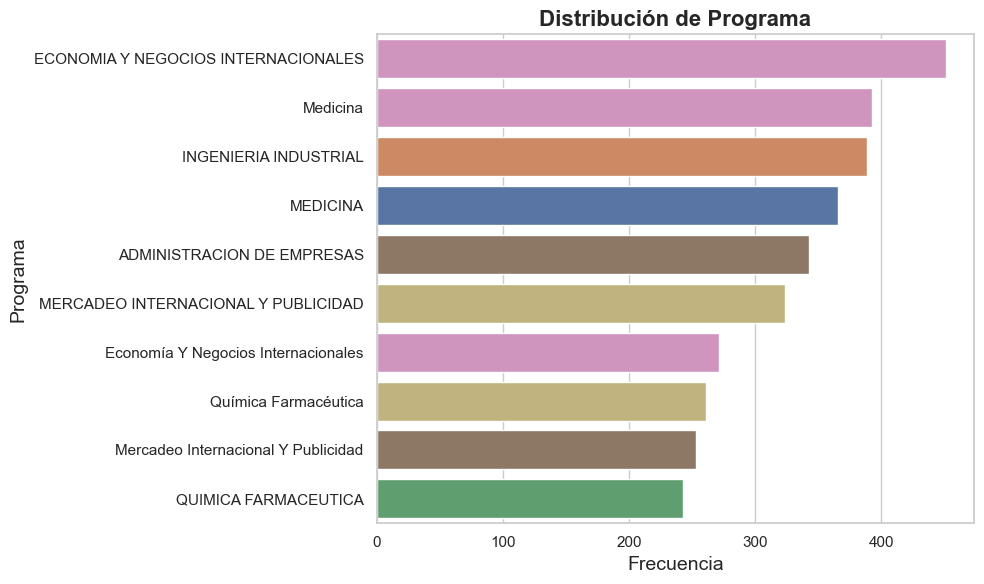

### Tabla de frecuencia **CIUDAD_NACIMIENTO**

,Frecuencia absoluta (n),Frecuencia relativa (%)
CIUDAD_NACIMIENTO,,
Cali,3557,51.92
CALI,651,9.50
Palmira,396,5.78
Popayán,174,2.54
Pasto,166,2.42
...,...,...
Guapi,1,0.01
Algeciras,1,0.01
CHAPARRAL,1,0.01


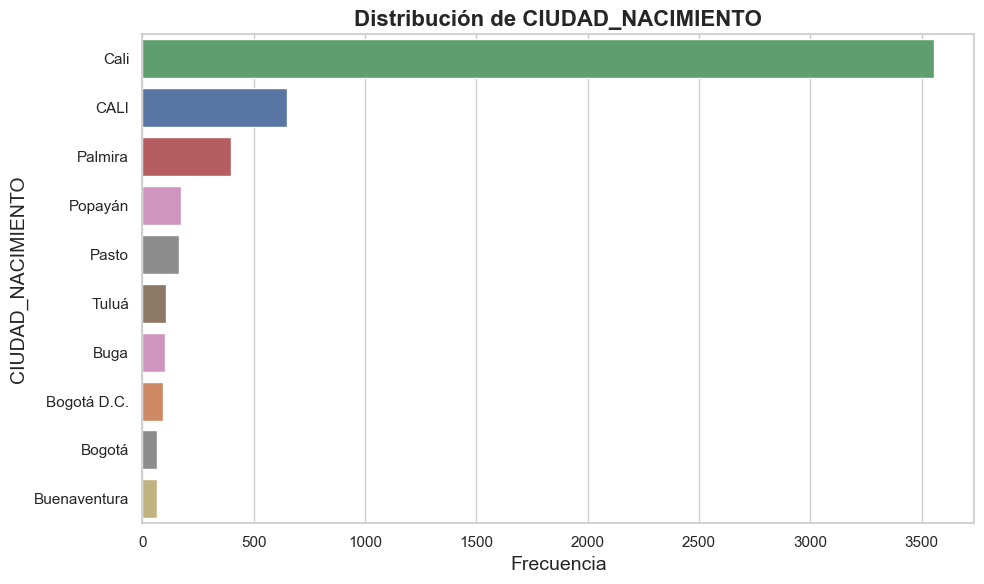

### Tabla de frecuencia **NACIONALIDAD**

,Frecuencia absoluta (n),Frecuencia relativa (%)
NACIONALIDAD,,
CO,6757,98.63
US,30,0.44
FR,17,0.25
ES,9,0.13
EC,5,0.07
AR,5,0.07
UK,4,0.06
BR,4,0.06
IT,3,0.04


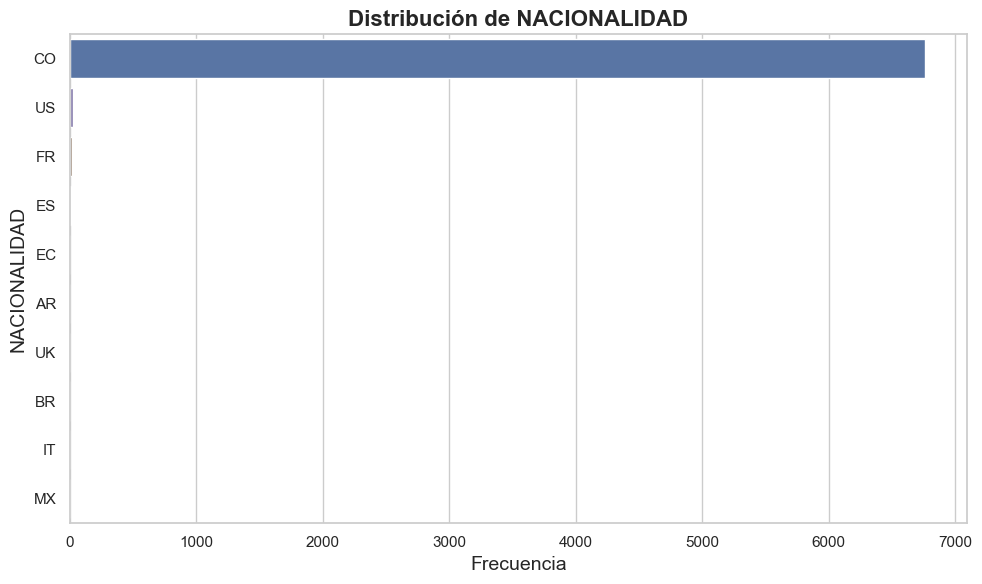

### Tabla de frecuencia **CIUDAD_RESIDENCIA**

,Frecuencia absoluta (n),Frecuencia relativa (%)
CIUDAD_RESIDENCIA,,
76001 - CALI,4790,69.92
76520 - PALMIRA,498,7.27
76364 - JAMUNDI,310,4.52
52001 - PASTO,116,1.69
19001 - POPAYAN,100,1.46
...,...,...
76126 - CALIMA (EL DARIEN),1,0.01
52260 - EL TAMBO,1,0.01
52418 - LOS ANDES (SOTOMAYOR),1,0.01


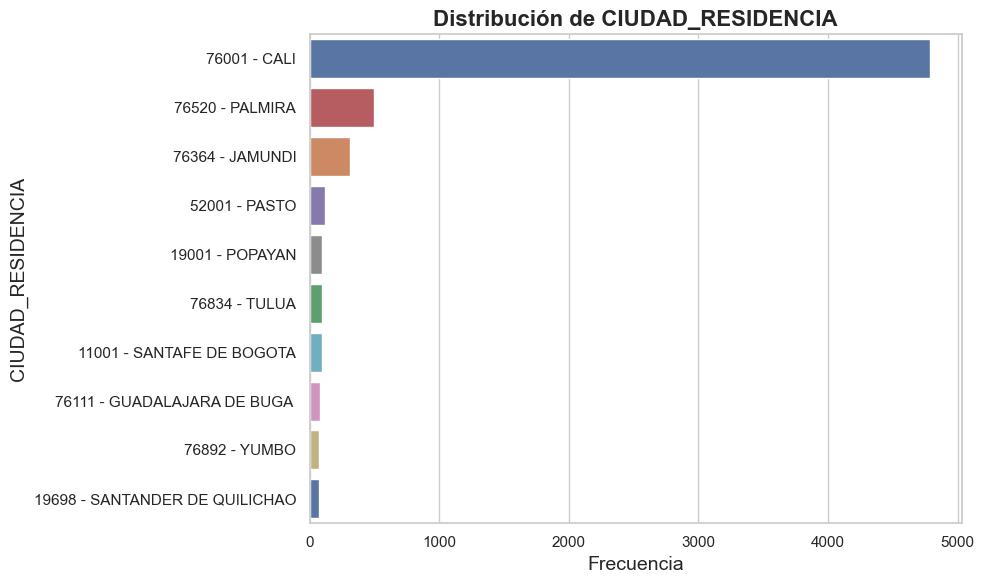

### Tabla de frecuencia **SEXO**

,Frecuencia absoluta (n),Frecuencia relativa (%)
SEXO,,
F,3783,55.22
M,3068,44.78


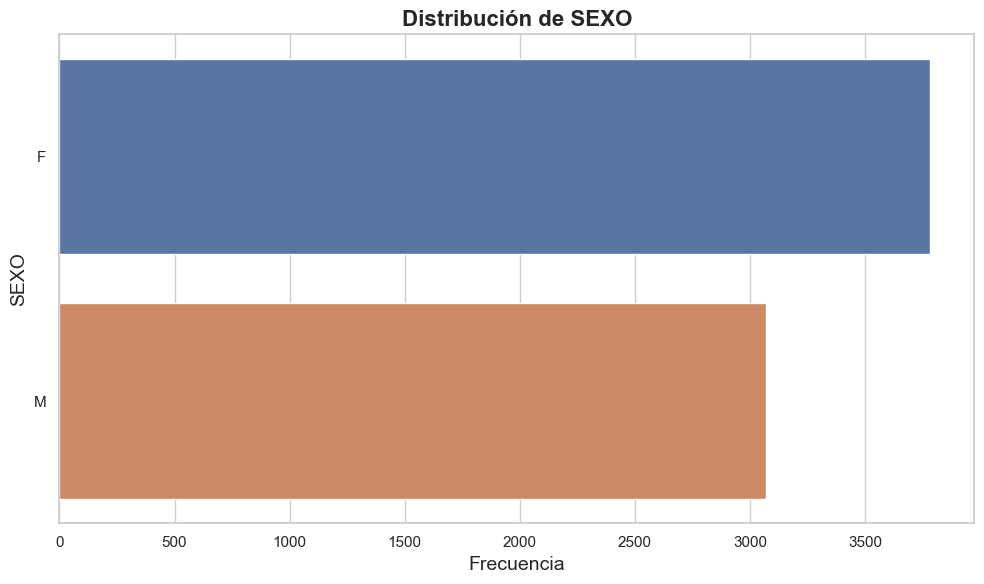

### Tabla de frecuencia **DEPTO_COLEGIO**

,Frecuencia absoluta (n),Frecuencia relativa (%)
DEPTO_COLEGIO,,
VALLE DEL CAUCA,5765,84.15
CAUCA,345,5.04
NARIÑO,323,4.71
QUINDIO,60,0.88
RISARALDA,51,0.74
NO INFORMA,47,0.69
HUILA,44,0.64
CUNDINAMARCA,40,0.58
PUTUMAYO,28,0.41


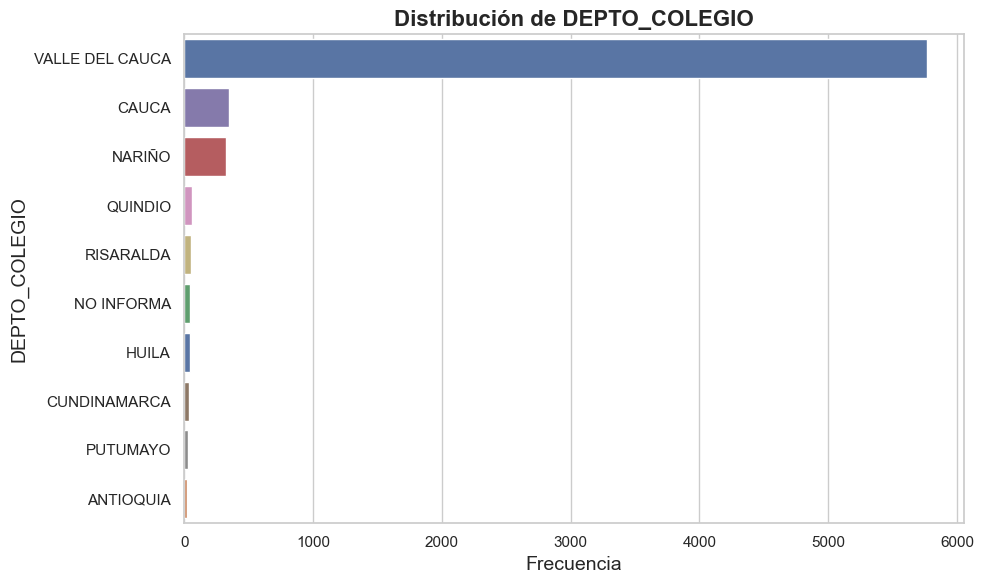

### Tabla de frecuencia **CIUDAD_COLEGIO**

,Frecuencia absoluta (n),Frecuencia relativa (%)
CIUDAD_COLEGIO,,
CALI,4183,61.06
PALMIRA,554,8.09
PASTO,202,2.95
YUMBO,189,2.76
POPAYAN,182,2.66
...,...,...
CAJICA,1,0.01
Circasia,1,0.01
ANSERMANUEVO,1,0.01


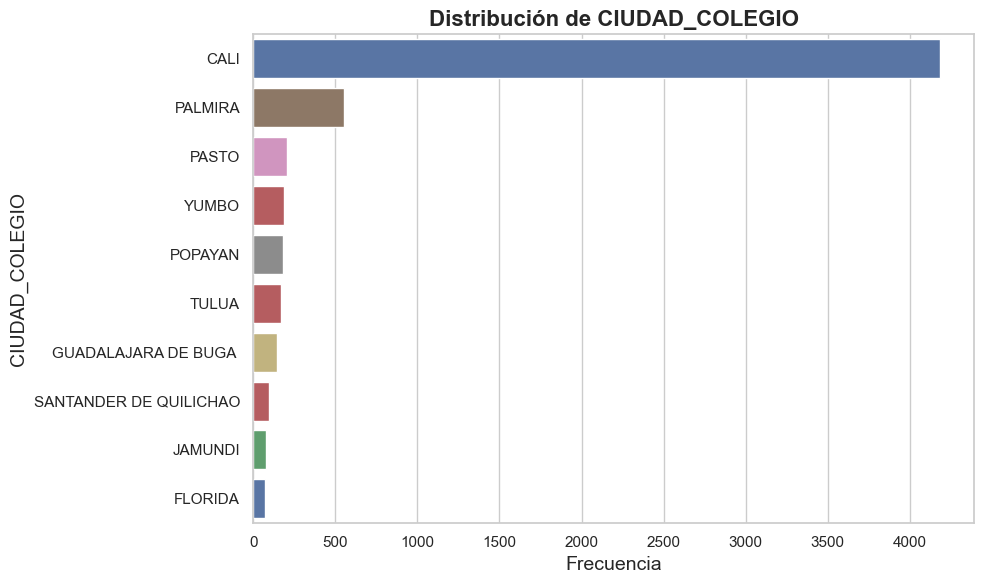

### Tabla de frecuencia **ETNIA**

,Frecuencia absoluta (n),Frecuencia relativa (%)
ETNIA,,
ME - Mestizo,2742,40.02
BA - Blanco,2167,31.63
No,693,10.12
AF - Afrodescendiente,594,8.67
OT - Otro,443,6.47
MU - Mulato,125,1.82
IN - Indígena,57,0.83
NE - Negro,25,0.36
GI - Gitano,3,0.04


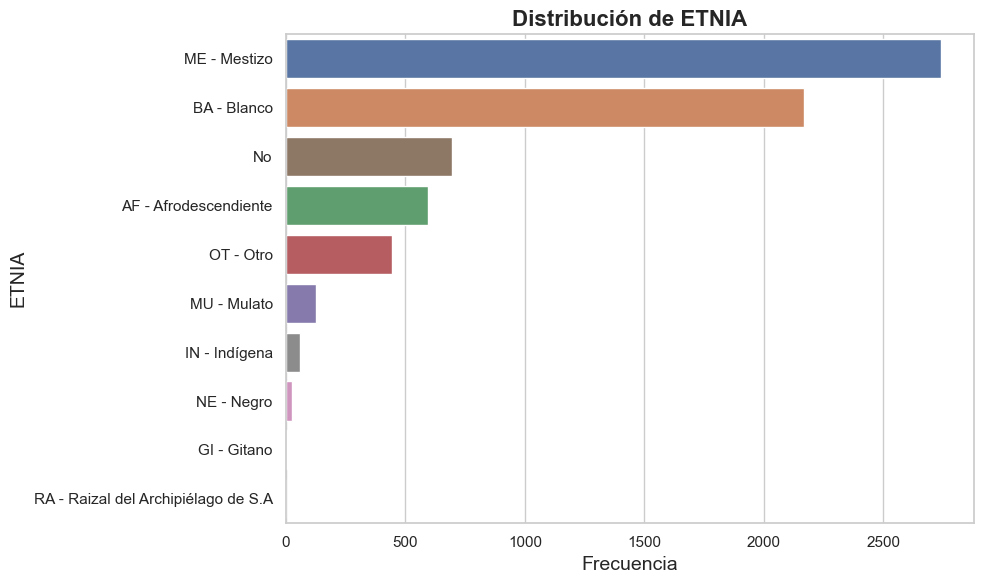

### Tabla de frecuencia **NIVEL_INGLES**

,Frecuencia absoluta (n),Frecuencia relativa (%)
NIVEL_INGLES,,
B1,2651,38.70
B+,1605,23.43
A2,1378,20.11
A1,930,13.57
A-,287,4.19


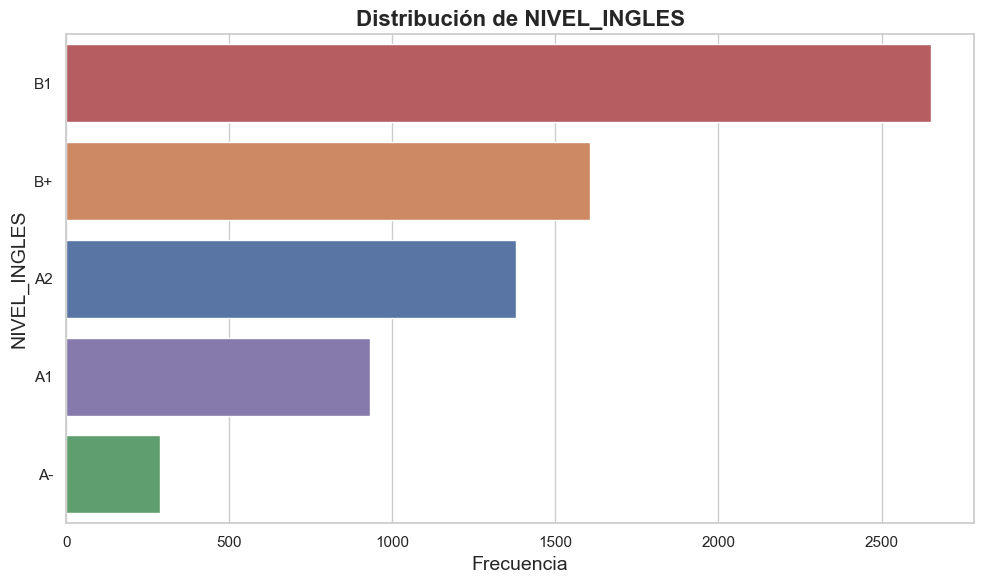

### Tabla de frecuencia **SER_PILO_PAGA**

,Frecuencia absoluta (n),Frecuencia relativa (%)
SER_PILO_PAGA,,
N,5647,82.43
S,1204,17.57


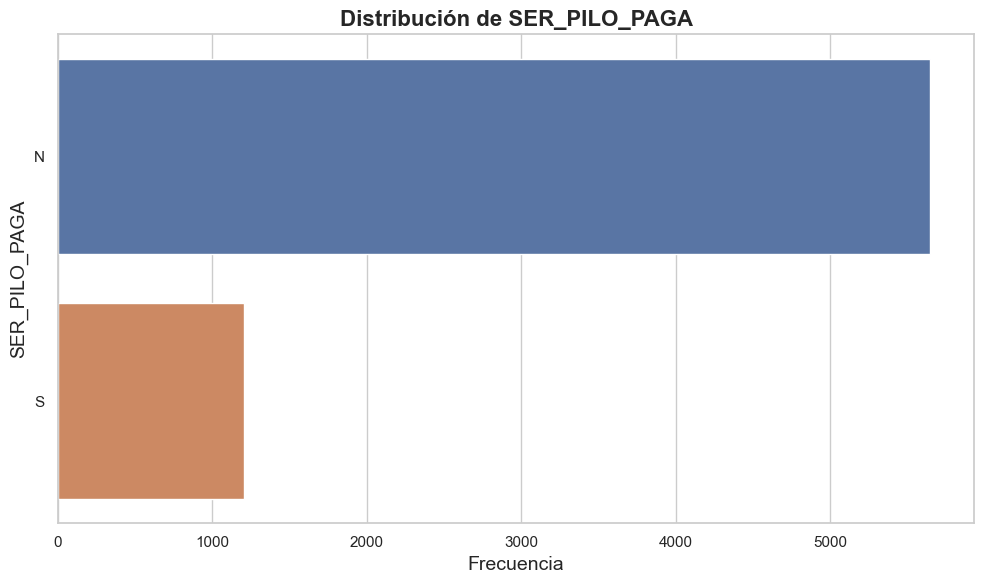

In [1046]:
def tabla_frecuencia_y_visualizacion(categoricas):
    sns.set_theme(style="whitegrid")
    
    for col in categoricas.columns:
        # Tabla de frecuencias
        freq_abs = categoricas[col].value_counts()
        freq_rel = (categoricas[col].value_counts(normalize=True) * 100).round(2)
        tabla_frecuencia = pd.DataFrame({'Frecuencia absoluta (n)': freq_abs, 'Frecuencia relativa (%)': freq_rel})
        
        # Mostrar tabla de frecuencia
        display(Markdown(f"### Tabla de frecuencia **{col}**"))
        display(tabla_frecuencia)
        
        # Visualización
        plt.figure(figsize=(10, 6))
        order = freq_abs.index[:10]  # Top 10 categorías para claridad
        ax = sns.countplot(data=categoricas, y=col, order=order, palette="deep", hue=col, legend=False)
        plt.title(f'Distribución de {col}', fontsize=16, fontweight='bold')
        plt.ylabel(col, fontsize=14)
        plt.xlabel('Frecuencia', fontsize=14)
        plt.tight_layout()
        plt.show()
# Llamar a la función
tabla_frecuencia_y_visualizacion(categoricas)

##### **Interpretación**

## **<span style="color:darkred"> Análisis Univariado - Variables Numéricas </span>**

In [1047]:
Estadisticas_descriptivas = numericas.describe()
Estadisticas_descriptivas

,Año,Puntaje global,PUNTAJE_GLOBAL_SABER_11,PERIODO_INGRESO_PROGRAMA,ESTRATO,PROMEDIO_ACUMULADO,Año_Nacimiento,Edad_Pro,Año_ICFES,Diferencia_Años_ICFES_SaberPro
count,6851.000000,6815.000000,6851.000000,6796.000000,6851.000000,6851.000000,6851.000000,6851.000000,6689.0,6689.0
mean,2020.405050,177.863830,317.057072,201630.622425,3.240841,4.045533,1982.245658,22.250912,2015.151592,5.235461
std,2.138728,20.695656,530.731464,228.207742,1.578534,0.287209,176.716950,2.678699,2.5929,1.583886
min,2017.000000,17.000000,0.000000,199920.000000,0.000000,3.220000,0.000000,0.000000,1992.0,-5.0
25%,2019.000000,166.000000,312.000000,201510.000000,2.000000,3.820000,1996.000000,21.000000,2014.0,4.0
50%,2020.000000,179.000000,350.000000,201620.000000,3.000000,4.045533,1998.000000,22.000000,2015.0,5.0
75%,2022.000000,191.000000,379.000000,201810.000000,5.000000,4.260000,2000.000000,23.000000,2017.0,6.0
max,2024.000000,258.000000,42861.000000,202420.000000,6.000000,4.880000,2004.000000,59.000000,2025.0,31.0


### Histogramas y boxplots para visualizar la distribución de cada variable númerica.

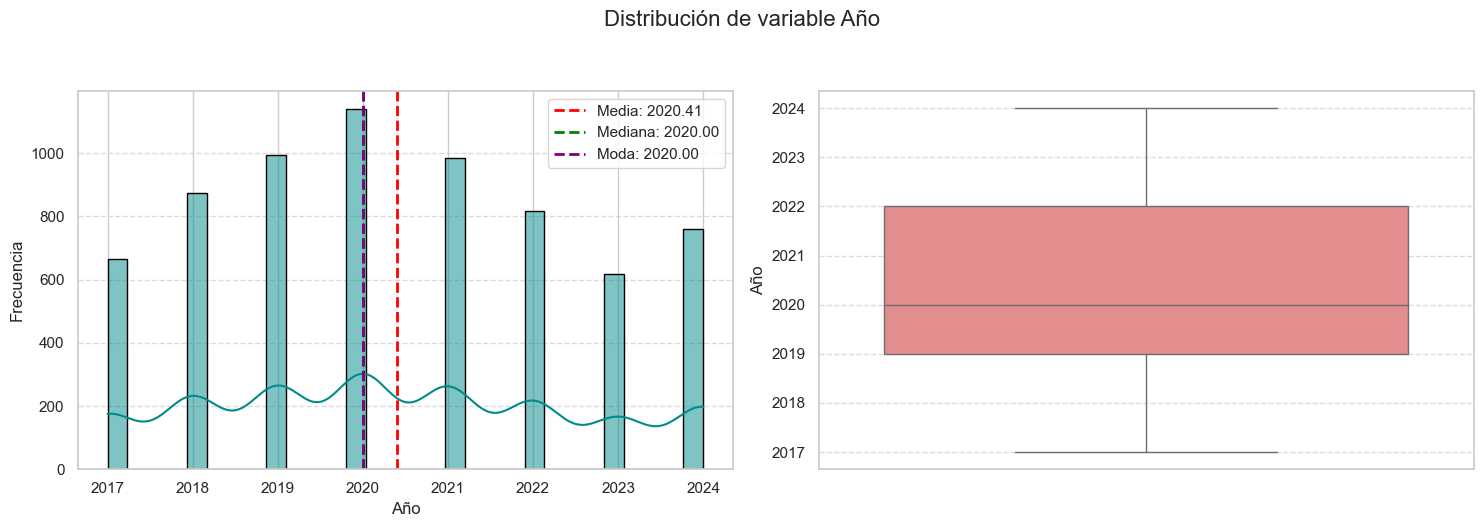

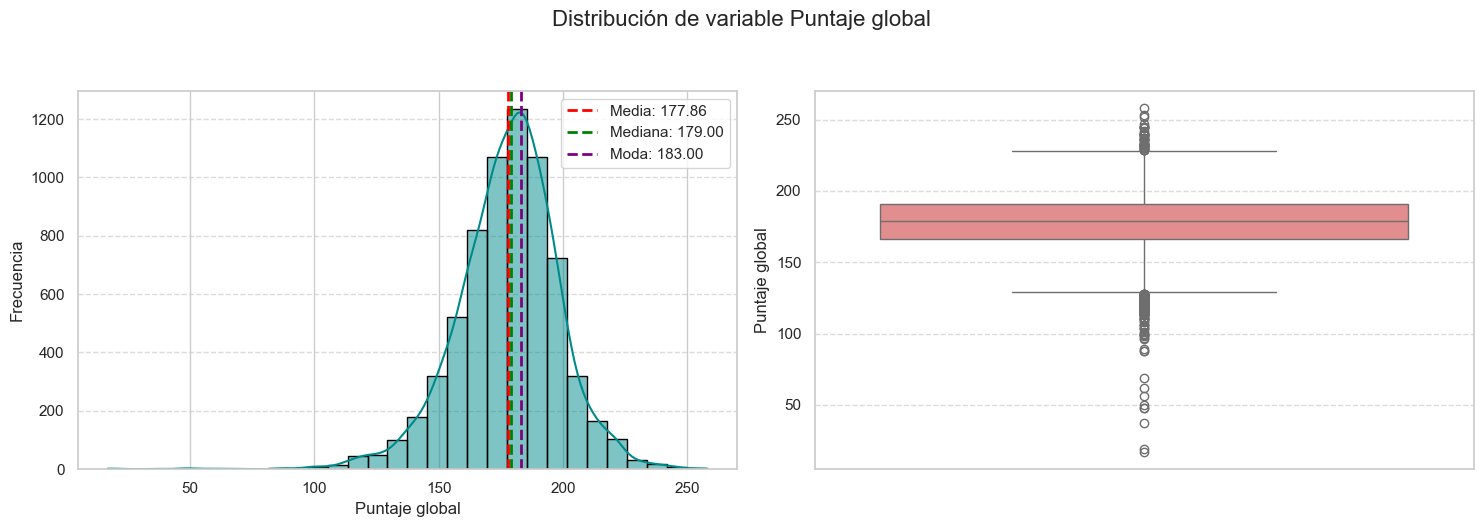

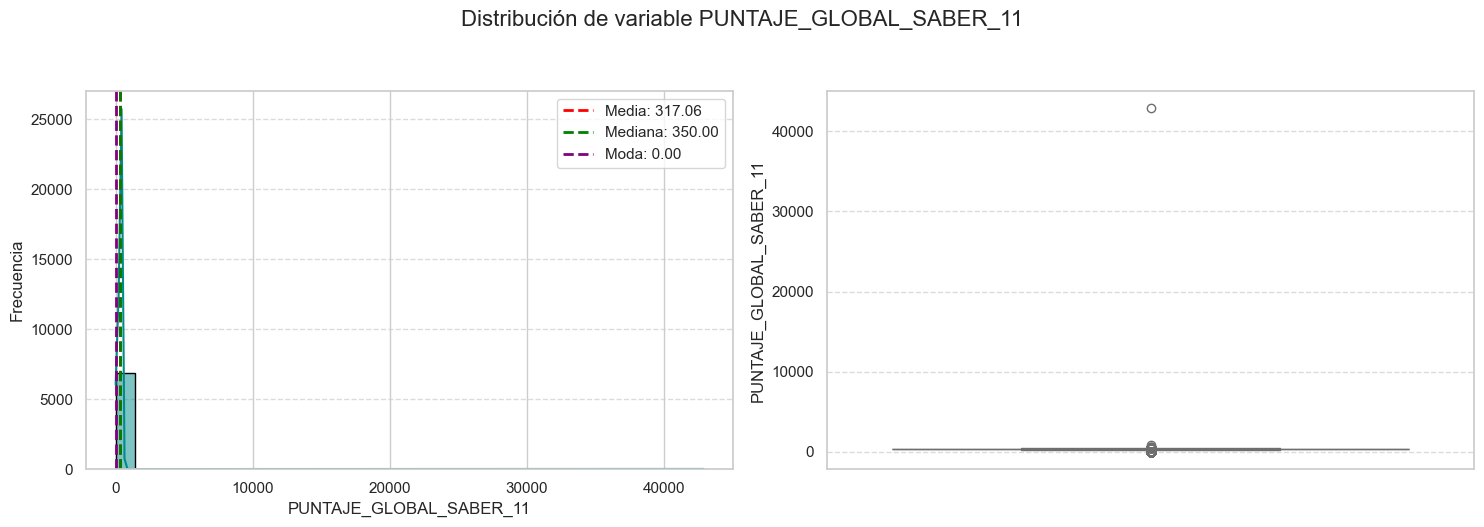

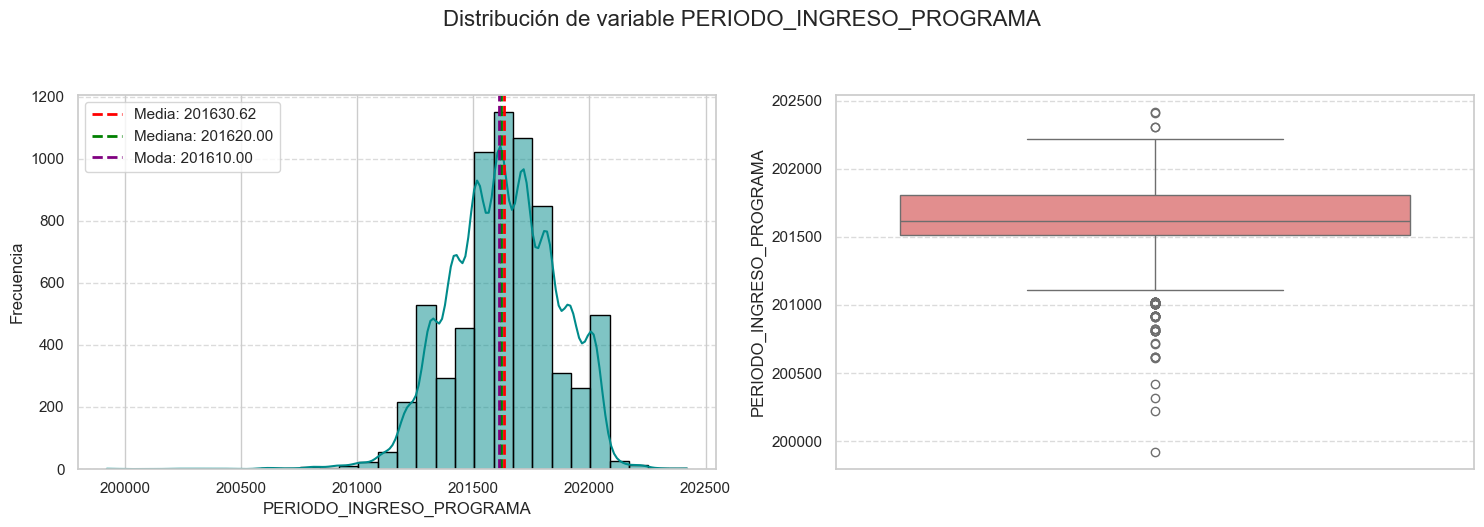

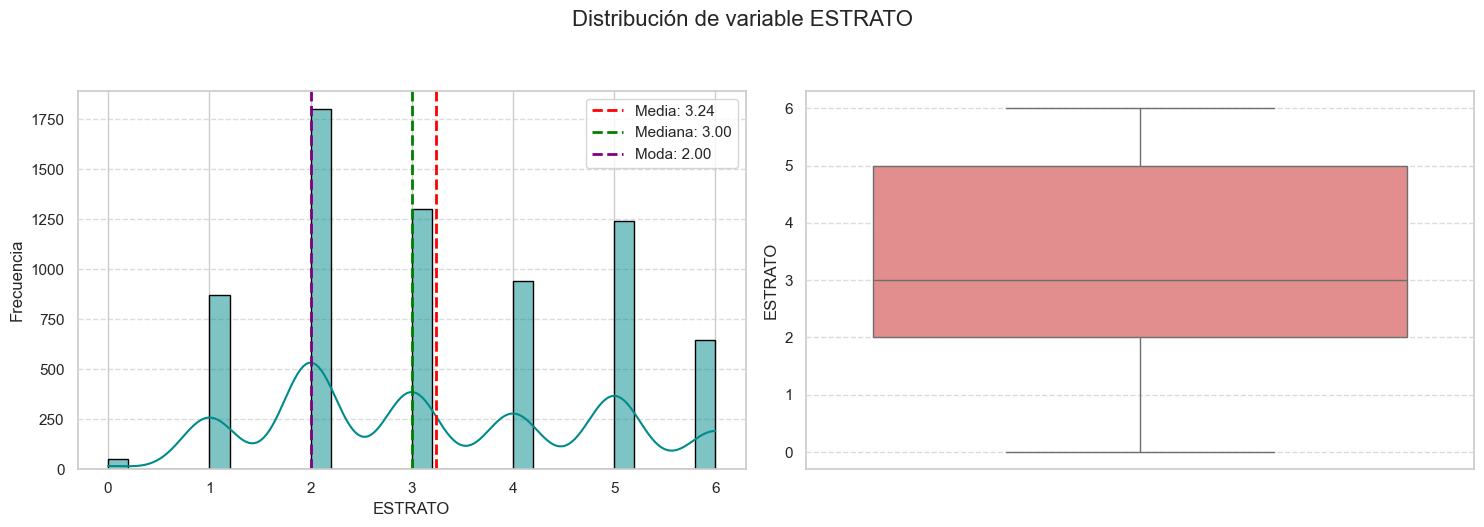

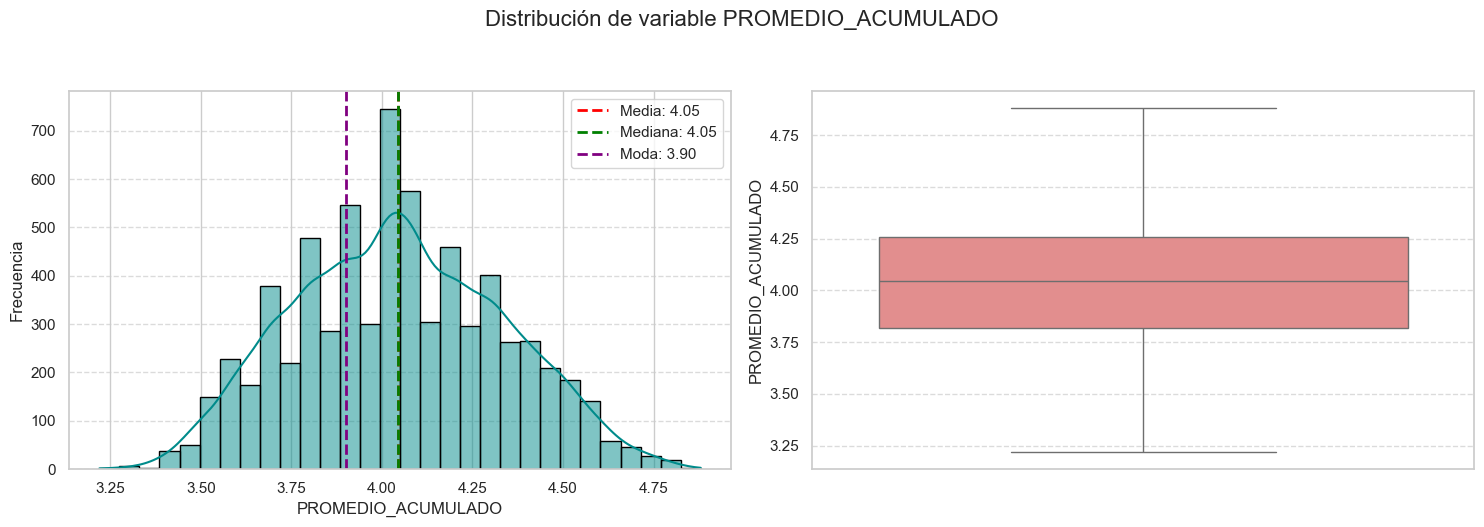

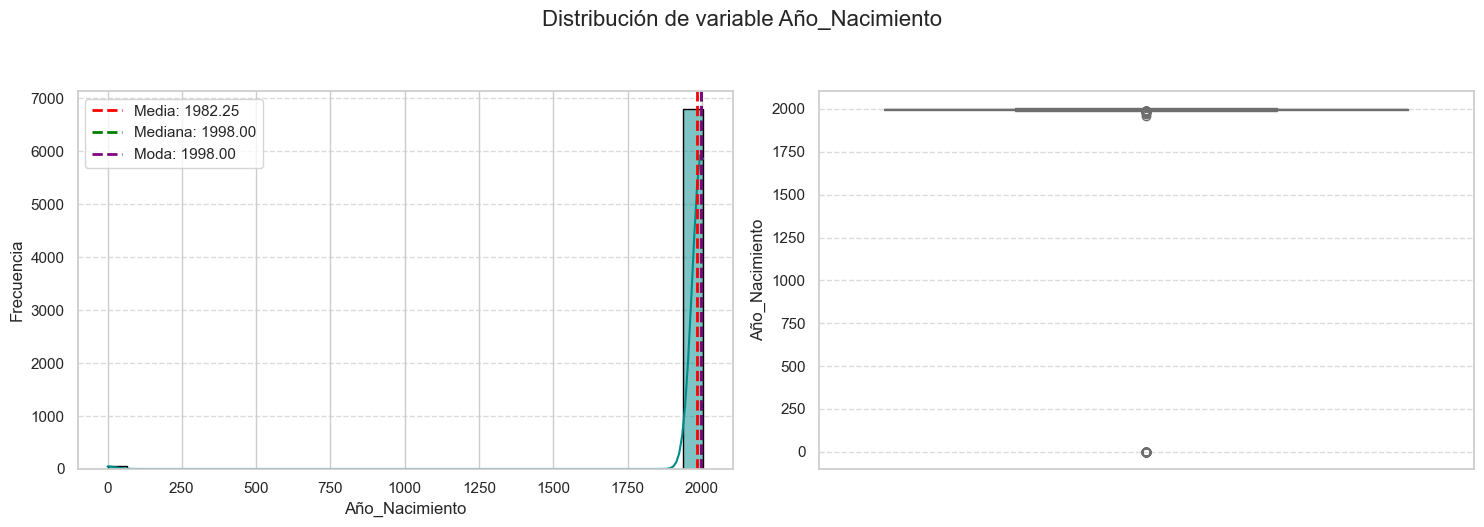

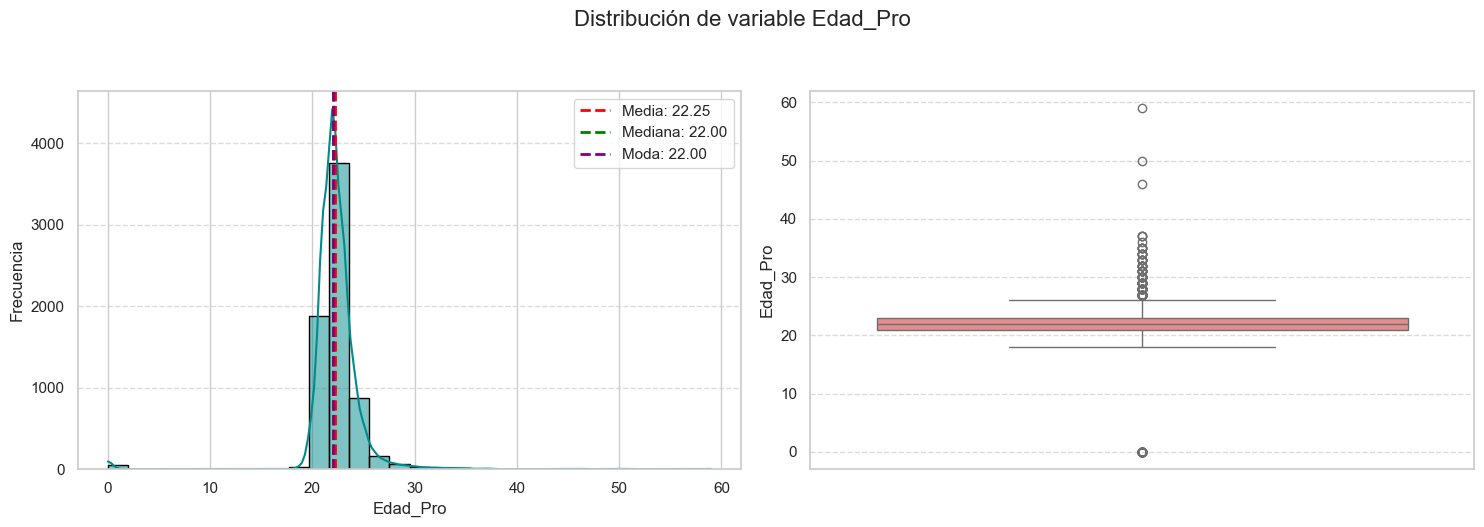

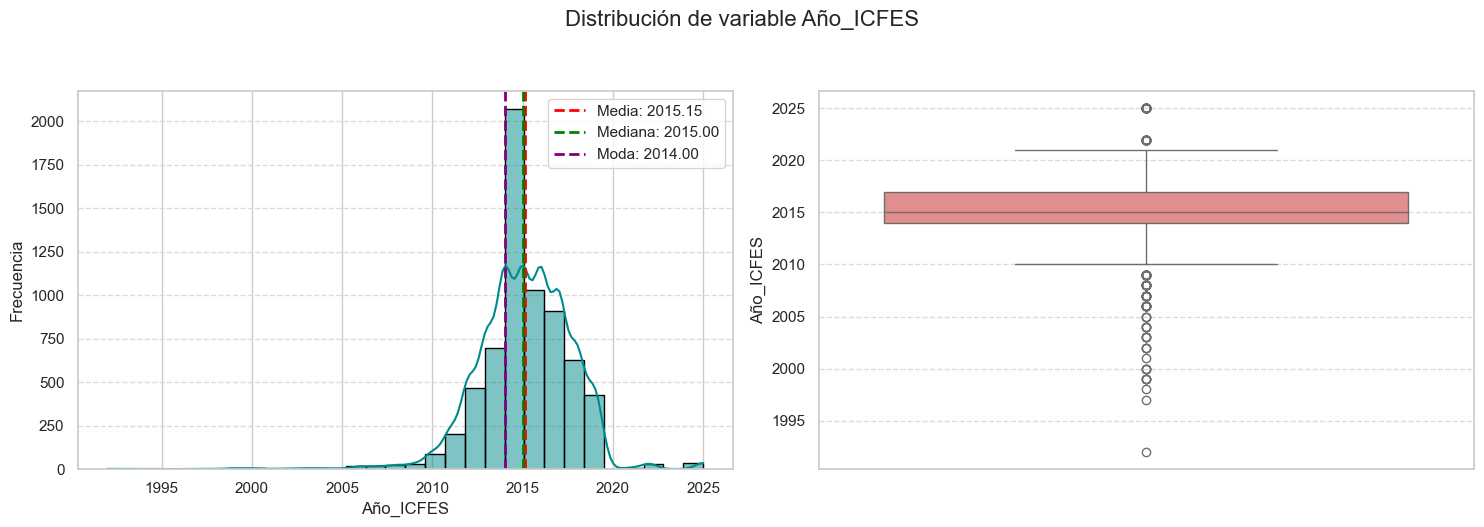

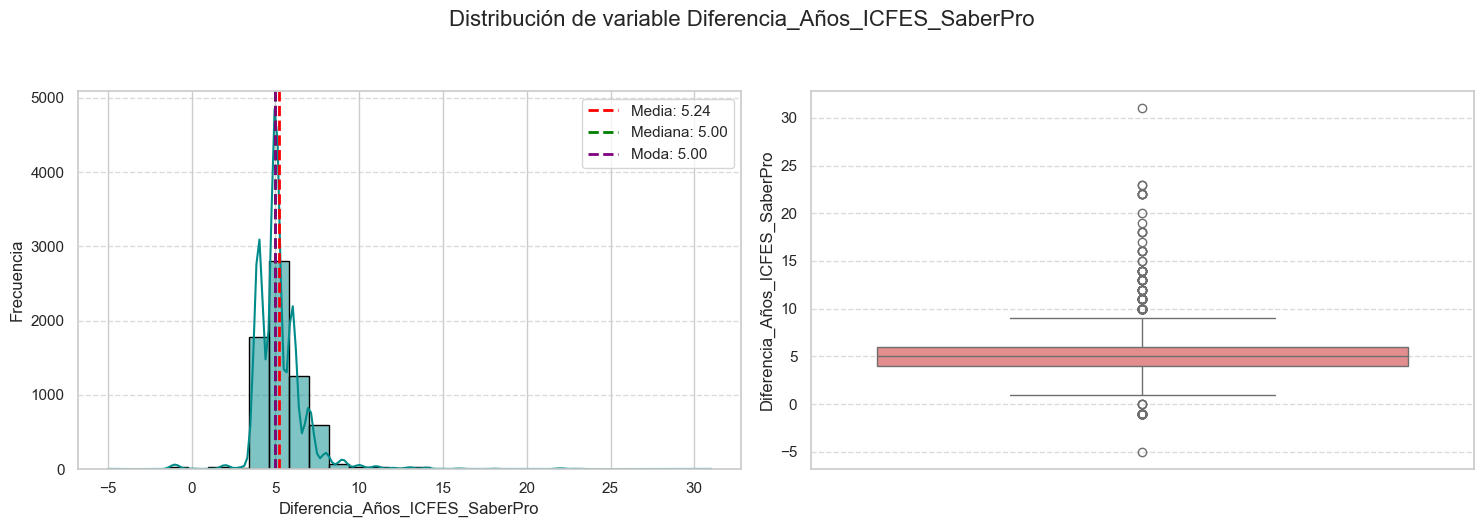

In [1048]:
for col in numericas:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(f'Distribución de variable {col}', fontsize=16, y=1.05)

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(numericas[col], bins=30, kde=True, color='darkcyan',edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Agregar líneas de media, mediana y moda al histograma
    media = numericas[col].mean()
    mediana = numericas[col].median()
    moda = numericas[col].mode()[0] if not numericas[col].mode().empty else numericas[col].iloc[0]

    ax1.axvline(media, color='red', linestyle='dashed', linewidth=2,
                label=f'Media: {media:.2f}')
    ax1.axvline(mediana, color='green', linestyle='dashed', linewidth=2,
                label=f'Mediana: {mediana:.2f}')
    ax1.axvline(moda, color='purple', linestyle='dashed', linewidth=2,
                label=f'Moda: {moda:.2f}')
    ax1.legend()



    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=numericas[col], color='lightcoral')
    plt.xlabel(' ')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)


    plt.tight_layout()
    plt.show()

##### **Interpretación**

* **Año**: presenta una distribución normal y sin atípicos.

* **Puntaje global**: Presenta una distribución aproximadamente normal, con una clara concentración de los datos cerca de la media; sin embargo, muestra un sesgo a la izquierda (asimetría negativa) y claros valores atípicos, especialmente en los valores bajos (un dato en 0 y varios por debajo de 100, e incluso valores altos).

* **Percentil nacional global**: La mayoría de los estudiantes se ubica en percentiles altos (75-100), lo que puede reflejar un posible sesgo a la izquierda y por ende la presencia de atipicos.

* **Puntaje global Saber 11**: Preenta una alta dispersión, con valores atipicos extremos evidentes.







#####  **Codificación de variables categoricas para el modelo**

In [1049]:
#from sklearn.preprocessing import OrdinalEncoder
# Lista de columnas a codificar
#categorical_cols = ['Programa', 'CIUDAD_NACIMIENTO', 'NACIONALIDAD','CIUDAD_RESIDENCIA', 'SEXO', 'ESTRATO', 'DEPTO_COLEGIO','CIUDAD_COLEGIO']
# Inicializar el codificador
#encoder = OrdinalEncoder()
# Ajustar y transformar los datos
#df_final[categorical_cols] = encoder.fit_transform(df_final[categorical_cols])
#print("DataFrame con columnas codificadas:")
#df_final.head()

In [1050]:
#df_final.to_excel ("df_final_2308.xlsx")
#from google.colab import files
#files.download ("df_final_2308.xlsx")